- Optimizing inventory levels based on sales data
    - `fact` how much a product has been purchased
    - join with`item_dim` and `trans` to explore
    - time-forcasting model based on season to predict how much inventory in the future
- sales analysis
    - what kind of products should a store focus on
    - time table, item table, fact
    
- what kind of explorations can i do on this?

In [1]:
!pwd

/Users/js/School/deloitte


In [7]:
import numpy as np
import pandas as pd
import re

In [23]:
all_csvs = 'Trans_dim.csv    customer_dim.csv item_dim.csv     time_dim.csv fact_table.csv   store_dim.csv'.lower()
all_data = {}
for csv_dir in all_csvs.split(' '):
    if re.search('csv', csv_dir):
        try:
            all_data[csv_dir.split('_')[0]] = pd.read_csv(csv_dir)
        except:
            all_data[csv_dir.split('_')[0]] = pd.read_csv(csv_dir, encoding='latin-1')
            

In [30]:
facts_df = all_data['fact']
item_df = all_data['item']
trans_df = all_data['trans']
time_df = all_data['time']

facts_df.head()

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0


In [85]:
store = all_data['store']
store.head()

,store_key,division,district,upazila
0,S0001,SYLHET,HABIGANJ,AJMIRIGANJ
1,S0002,SYLHET,HABIGANJ,BAHUBAL
2,S0003,SYLHET,HABIGANJ,BANIACHONG
3,S0004,SYLHET,HABIGANJ,CHUNARUGHAT
4,S0005,SYLHET,HABIGANJ,HABIGANJ SADAR


In [88]:
len(store['division'].unique()), len(store['district'].unique()), len(store['upazila'].unique())

(7, 64, 540)

In [98]:
temp = facts_df.merge(store, on='store_key').groupby('district').size()
temp

district
BAGERHAT      12360
BANDARBAN      9515
BARGUNA        8318
BARISAL       27333
BHOLA          9715
              ...  
SIRAJGANJ     12344
SUNAMGANJ     15113
SYLHET        16437
TANGAIL       16832
THAKURGAON     6914
Length: 64, dtype: int64

<BarContainer object of 64 artists>

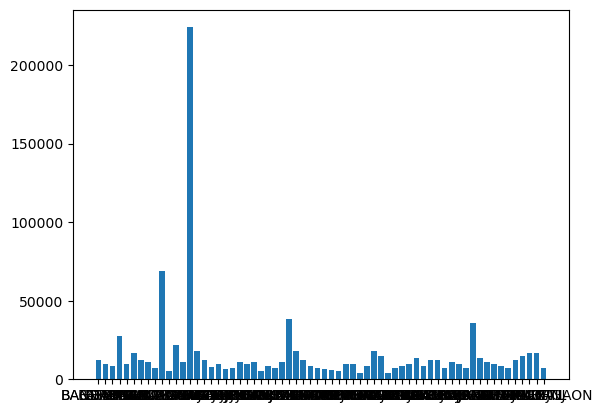

In [100]:
plt.bar(temp.index, temp.values)

In [47]:
facts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   payment_key    1000000 non-null  object 
 1   coustomer_key  1000000 non-null  object 
 2   time_key       1000000 non-null  object 
 3   item_key       1000000 non-null  object 
 4   store_key      1000000 non-null  object 
 5   quantity       1000000 non-null  int64  
 6   unit           996277 non-null   object 
 7   unit_price     1000000 non-null  float64
 8   total_price    1000000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 68.7+ MB


In [28]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   item_key     264 non-null    object 
 1   item_name    264 non-null    object 
 2   desc         264 non-null    object 
 3   unit_price   264 non-null    float64
 4   man_country  264 non-null    object 
 5   supplier     264 non-null    object 
 6   unit         263 non-null    object 
dtypes: float64(1), object(6)
memory usage: 14.6+ KB


In [29]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   payment_key  39 non-null     object
 1   trans_type   39 non-null     object
 2   bank_name    39 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


In [31]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time_key  99999 non-null  object
 1   date      99999 non-null  object
 2   hour      99999 non-null  int64 
 3   day       99999 non-null  int64 
 4   week      99999 non-null  object
 5   month     99999 non-null  int64 
 6   quarter   99999 non-null  object
 7   year      99999 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 6.1+ MB


In [38]:
# join time_df, item and facts, with facts as the primary
temp = facts_df.merge(item_df, on= 'item_key')
temp = temp.merge(time_df, on='time_key')

In [40]:
df = temp.copy()

In [45]:
df[['store_key', 'item_key', 'item_name']].pivot_table(columns = 'store_key', index = 'item_key', aggfunc='count')

item_name                                                        \
store_key     S0001 S0002 S0003 S0004 S0005 S0006 S0007 S0008 S0009 S0010   
item_key                                                                    
I00001         10.0   7.0   4.0   9.0   5.0   3.0   6.0   4.0   6.0   6.0   
I00002          1.0   1.0   5.0   2.0   5.0   7.0   7.0   8.0   5.0   5.0   
I00003          8.0   5.0   5.0   4.0   3.0   6.0   3.0   2.0   3.0   6.0   
I00004          7.0   2.0   7.0   5.0   5.0   4.0   8.0   8.0   6.0   3.0   
I00005          4.0   4.0   5.0   7.0   8.0   9.0   3.0   2.0   3.0   5.0   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
I00260          4.0   4.0   5.0   4.0   8.0   7.0   6.0   9.0  12.0   3.0   
I00261          4.0   4.0   3.0   6.0   5.0   6.0   8.0  10.0   5.0   8.0   
I00262          6.0   2.0   4.0   6.0   6.0   4.0   3.0   4.0   1.0   5.0   
I00263          6.0   7.0   4.0   6.0   9.0  12.0   5.0   4.0   3.0   2.0   
I00264          3.0   6.0   2.0   4.0   4.0   6.0  10.0   8.0  10.0   6.0   

           ...                                                              
store_key  ... S0090 S0091 S0092 S0093 S0094 S0095 S0096 S0097 S0098 S0099  
item_key   ...                                                              
I00001     ...   3.0   7.0   4.0   7.0   5.0   6.0   6.0   7.0   3.0   5.0  
I00002     ...   2.0   6.0   6.0   8.0   9.0   4.0   5.0   3.0   5.0   6.0  
I00003     ...   7.0   3.0   5.0   4.0   4.0   3.0   5.0   5.0   9.0   3.0  
I00004     ...   3.0   8.0   7.0   5.0   2.0   5.0   7.0   1.0   4.0   6.0  
I00005     ...   3.0   1.0  10.0   6.0   7.0   5.0   5.0   5.0   1.0   5.0  
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
I00260     ...   5.0   3.0   3.0   4.0   6.0  12.0   7.0   6.0   4.0   8.0  
I00261     ...   8.0   5.0   4.0   5.0   8.0   3.0   7.0   5.0   3.0   3.0  
I00262     ...   6.0   5.0   6.0   9.0   3.0  10.0   6.0   4.0   6.0   3.0  
I00263     ...   1.0  10.0   8.0   5.0   2.0   6.0  10.0   3.0   5.0   2.0  
I00264     ...   9.0   5.0   4.0   4.0   6.0   3.0   7.0   5.0   4.0   7.0  

[264 rows x 726 columns]

- aggregations based on season, total price (earning)

In [56]:
facts_df.groupby('item_key')[['total_price']].sum().sort_values(by='total_price', ascending=False).merge(item_df, on='item_key')

,item_key,total_price,item_name,desc,unit_price,man_country,supplier,unit
0,I00061,1305700.0,Red Bull 12oz,Beverage - Energy/Protein,55.00,United States,MAESA SAS,cans
1,I00115,1245394.0,K Cups Daily Chef Columbian Supremo,Coffee K-Cups,53.00,India,Indo Count Industries Ltd,ct
2,I00119,1188843.0,K Cups Original Donut Shop Med. Roast,Coffee K-Cups,53.00,India,Indo Count Industries Ltd,ct
3,I00116,1109760.0,K Cups Dunkin Donuts Medium Roast,Coffee K-Cups,48.00,United States,MAESA SAS,ct
4,I00117,1042406.0,K Cups Folgers Lively Columbian,Coffee K-Cups,46.00,Cambodia,NINGBO SEDUNO IMP & EXP CO.LTD,ct
...,...,...,...,...,...,...,...,...
259,I00013,150363.0,Diet Gingerale 12 oz cans,a. Beverage - Soda,6.75,United States,MAESA SAS,cans
260,I00028,149998.5,Sprite Zero - 12 pack,a. Beverage - Soda,6.75,poland,CHROMADURLIN S.A.S,cans
261,I00010,149890.5,Diet Coke - 12 oz cans,a. Beverage - Soda,6.75,Lithuania,BIGSO AB,cans
262,I00099,139848.0,Coffee-Mate Original Flavor Cold,Coffee Cream,6.00,Bangladesh,DENIMACH LTD,oz


In [73]:
import matplotlib.pyplot as plt
product_freq_profits = df[['desc', 'total_price']].groupby(['desc']).agg(['count', 'sum'])['total_price']

In [74]:
std_col = lambda df, col_name: (df[col_name] - df[col_name].mean()) / df[col_name].std()

In [75]:
product_freq_profits['count'] = std_col(product_freq_profits, 'count')
product_freq_profits['sum'] = std_col(product_freq_profits, 'sum')

In [77]:
product_freq_profits.index

Index(['Beverage - Energy/Protein', 'Beverage - Energy/Protein ',
       'Beverage - Gatorade', 'Beverage - Iced Tea', 'Beverage - Juice',
       'Beverage Water', 'Coffee Cream', 'Coffee Creamer', 'Coffee Ground',
       'Coffee Hot Cocoa', 'Coffee K-Cups', 'Coffee K-Cups Tea',
       'Coffee Stirrers', 'Coffee Sweetener', 'Dishware - Bowls',
       'Dishware - Cups Cold', 'Dishware - Cups Hot', 'Dishware - Plates',
       'Dishware - Utensils', 'Food - Chips', 'Food - Chocolate',
       'Food - Healthy', 'Food - Nuts', 'Food - Snacks', 'Food - Sweets',
       'Gum - Mints', 'Kitchen Supplies', 'Medicine', 'a. Beverage - Soda',
       'a. Beverage Sparkling Water'],
      dtype='object', name='desc')

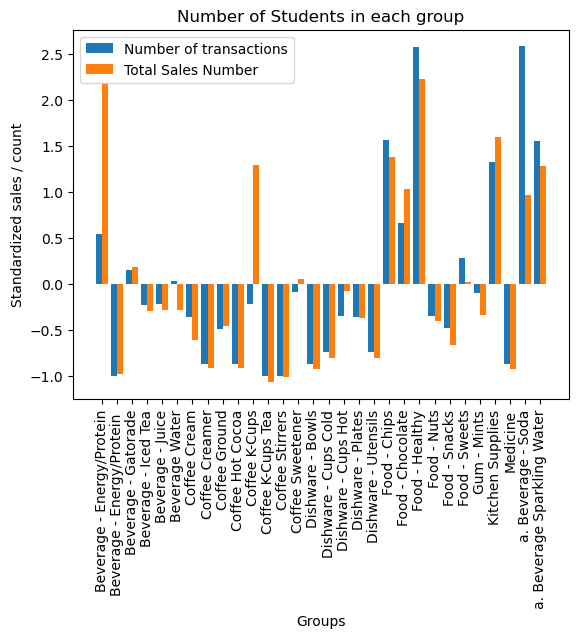

In [84]:
X = list(product_freq_profits.index)
Ygirls = [10,20,20,40] 
Zboys = [20,30,25,30] 
  
X_axis = np.arange(len(product_freq_profits.index)) 
  
plt.bar(X_axis - 0.2, product_freq_profits['count'], 0.4, label = 'Number of transactions') 
plt.bar(X_axis + 0.2, product_freq_profits['sum'], 0.4, label = 'Total Sales Number') 
  
plt.xticks(X_axis, X) 
plt.xticks(rotation=90)
plt.xlabel("Groups") 
plt.ylabel("Standardized sales / count") 
plt.title("Number of Students in each group") 
plt.legend() 
plt.show() 